# import statements


In [17]:
import cv2
import numpy as np
import random
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import os

import pandas as pd
import shutil



# draw junctions


In [12]:
#in a circular region randomly place connection point of the junction
def non_uniform_distribution_circle(r, x, y):
    r = r*random.random()
    theta = 2*np.pi*random.random()
    return int(x+r*np.cos(theta)), int(y+r*np.sin(theta))


#draw the junctions based on x and y, randomly select which junction
def draw_t_junction(size, x_center, y_center, perturbation_amount=2):
    image = np.zeros((size, size, 3), dtype=np.uint8)
    t = 2
    rand_junc = random.randint(0,8)

    junction_lst = [[0,1,0,1],
                    [0,1,1,0],
                    [0,1,1,1],
                    [1,0,0,1],
                    [1,0,1,0],
                    [1,0,1,1],
                    [1,1,0,1],
                    [1,1,1,0],
                    [1,1,1,1]]
    junction = junction_lst[rand_junc]

    # Random perturbations for line endpoints
    x_perturbation = np.random.randint(-perturbation_amount, perturbation_amount) 
    y_perturbation = np.random.randint(-perturbation_amount, perturbation_amount)  

    # Draw vertical line
    if junction[0] == 1:
        end_x = x_center + x_perturbation
        end_y = size
        cv2.line(image, (x_center, y_center), (end_x, end_y), (255, 255, 255), thickness=t)  # Top
    if junction[1] == 1:
        end_x = x_center + x_perturbation
        end_y = 0
        cv2.line(image, (x_center, y_center), (end_x, end_y), (255, 255, 255), thickness=t)  # bottom
    if junction[2] == 1:
        end_x = 0
        end_y = y_center + y_perturbation
        cv2.line(image, (x_center, y_center), (end_x, end_y), (255, 255, 255), thickness=t)  # left
    if junction[3] == 1:
        end_x = size
        end_y = y_center + y_perturbation
        cv2.line(image, (x_center, y_center), (end_x, end_y), (255, 255, 255), thickness=t)  # right

    image = cv2.GaussianBlur(image, (3, 3), 0)  # Adjust kernel size as needed

    return image, junction

def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Add Gaussian noise to an image.
    :param image: Input image.
    :param mean: Mean of the Gaussian noise.
    :param sigma: Standard deviation of the Gaussian noise.
    :return: Noisy image.
    """
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Ensure the values are within range
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

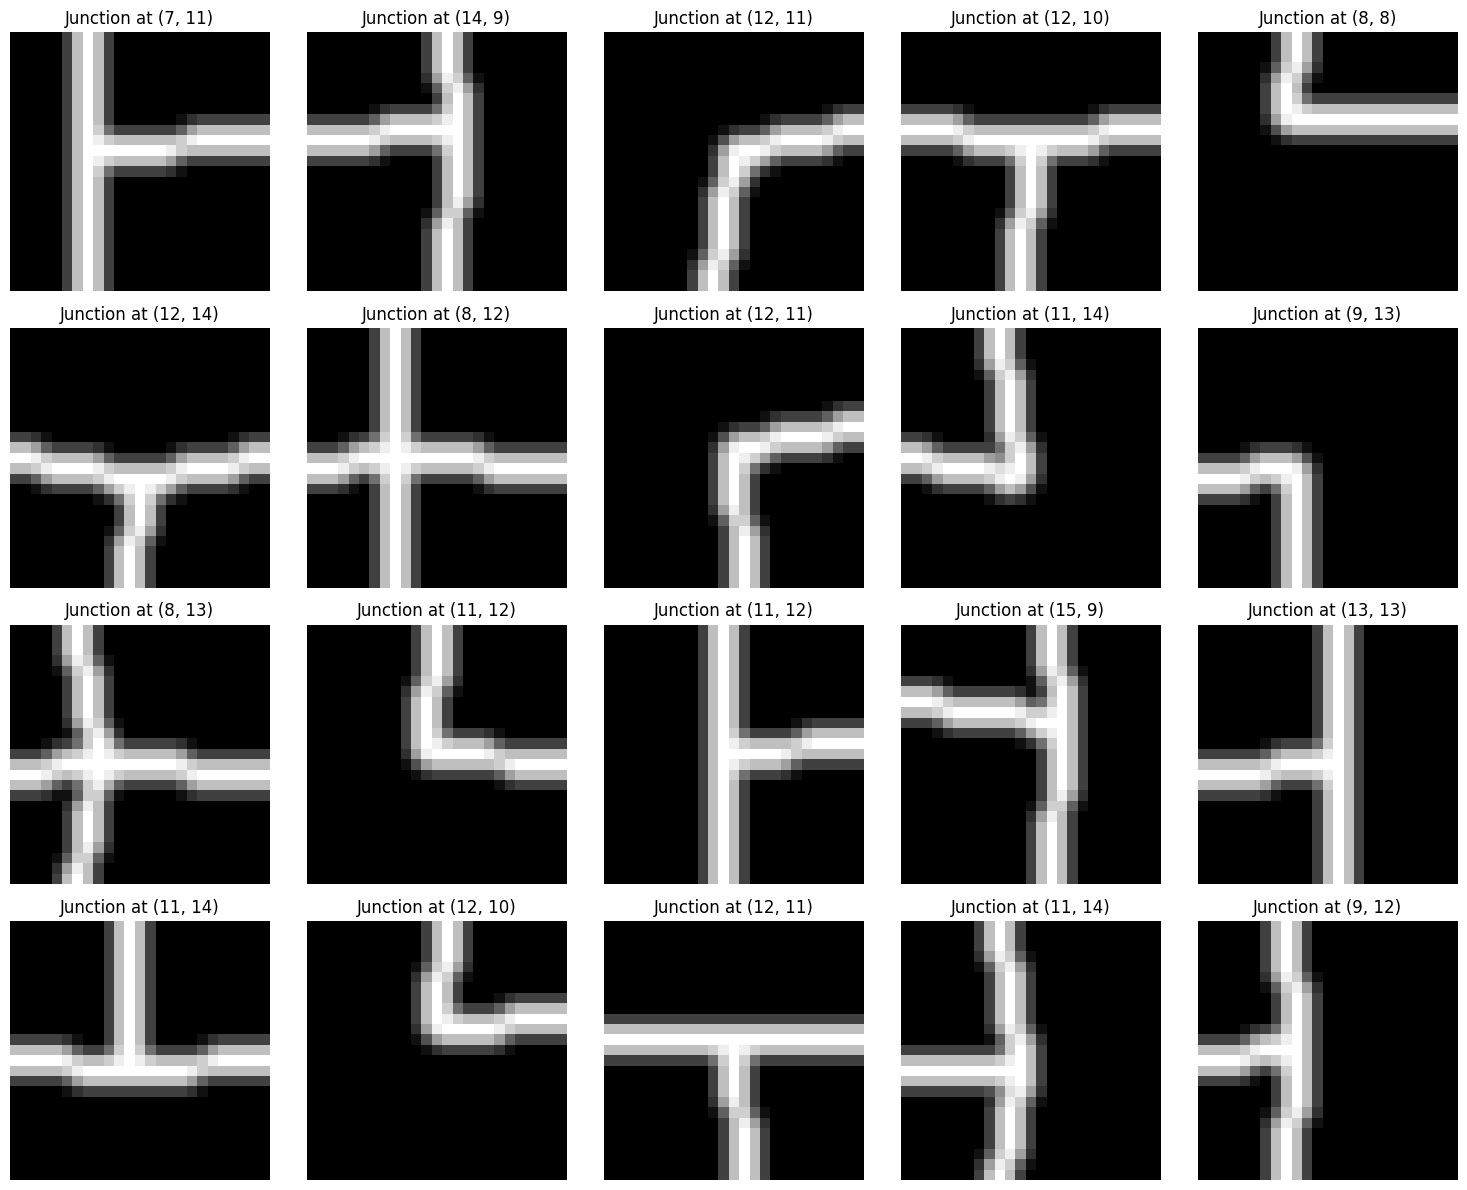

In [15]:

size = 25  # Size of the junction images

fig, axs = plt.subplots(4, 5, figsize=(15, 12))  # To show 20 images in a grid
axs = axs.ravel()

for i in range(20):
    x, y = non_uniform_distribution_circle(5, 12,12)
    # print(x,y)
    # t_junction_img = draw_t_junction(size)
    t_junction_img, junc = draw_t_junction(size, x, y)

    # Save or display images
    cv2.imwrite('t_junction.jpg', t_junction_img)
    axs[i].imshow(cv2.cvtColor(t_junction_img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f"Junction at ({x}, {y})")
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(15, 12))  # To show 20 images in a grid
# axs = axs.ravel()

# x, y = non_uniform_distribution_circle(5, 12,12)
# original_img = draw_t_junction(size, x, y)
# noisy_img = add_gaussian_noise(original_img)


#  # Save or display images
# cv2.imwrite('t_junction.jpg', original_img)
# axs[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))

#  # Save or display images
# cv2.imwrite('t_junction.jpg', noisy_img)
# axs[1].imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))

# plt.tight_layout()
# plt.show()

# Generate junction datset
Should be about 200 per component thus 1600 junctions

In [14]:
junction_lst = [[0,1,0,1],
                    [0,1,1,0],
                    [0,1,1,1],
                    [1,0,0,1],
                    [1,0,1,0],
                    [1,0,1,1],
                    [1,1,0,1],
                    [1,1,1,0],
                    [1,1,1,1]]


base_dir = 'dataset/components'
folders = set()
for junc in junction_lst:
    a,b,c,d = junc
    string = 'junction'+str(a)+str(b)+str(c)+str(d)
    folders.add(string)
    print(string)


# Ensure base directory and all necessary subdirectories exist
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

junction0101
junction0110
junction0111
junction1001
junction1010
junction1011
junction1101
junction1110
junction1111


In [20]:

size = 25  # Size of the junction images

# fig, axs = plt.subplots(4, 5, figsize=(15, 12))  # To show 20 images in a grid
# axs = axs.ravel()
all_junc = {"junction0101":0,"junction0110":0,"junction0111":0,"junction1001":0,"junction1010":0,"junction1011":0,"junction1101":0,"junction1110":0,"junction1111":0}

for i in range(100):
    x, y = non_uniform_distribution_circle(5, 12,12)
    # print(x,y)
    # t_junction_img = draw_t_junction(size)
    t_junction_img, junction = draw_t_junction(size, x, y)
    a,b,c,d = junction
    folder_name = 'junction'+str(a)+str(b)+str(c)+str(d)

    all_junc[folder_name]+=1

    num = all_junc[folder_name]

    
    destination_path =os.path.join(base_dir, folder_name)

    cv2.imwrite(os.path.join(destination_path,str(num)+'.jpg'), t_junction_img)
    


print(all_junc)

#     # Save or display images
#     cv2.imwrite('t_junction.jpg', t_junction_img)
#     axs[i].imshow(cv2.cvtColor(t_junction_img, cv2.COLOR_BGR2RGB))
#     axs[i].set_title(f"Junction at ({x}, {y})")
#     axs[i].axis('off')

# plt.tight_layout()
# plt.show()

    
    # print(destination_path)
    # # Copy the file
    



{'junction0101': 222, 'junction0110': 171, 'junction0111': 188, 'junction1001': 202, 'junction1010': 206, 'junction1011': 184, 'junction1101': 187, 'junction1110': 175, 'junction1111': 165}
